In [3]:
import matplotlib as plt
import numpy as np
import pandas as pd
import os
import csv

In [4]:
# Declare the file path for the circuits CSV
circuits_file_path = '/Users/noetorres/Desktop/archive/circuits.csv'

# Import the Circuits data
circuits_df = pd.read_csv(circuits_file_path)

# Sanity check / Print the Circuits DF
# circuits_df.head(100)

# Clean up / remove the unneccessary columns
circuits_df = circuits_df.drop('url', axis=1)

#sanity check
# circuits_df.head(100)

In [5]:
# Declare the file path for the constructor_results csv
constructor_results_file_path = '/Users/noetorres/Desktop/archive/constructor_results.csv'

# Import the constructor_results data
constructor_results_df = pd.read_csv(constructor_results_file_path)

# Sanity check / Print the constructor results DF
# constructor_results_df.head(100)

     constructorId  wins             name
5                6  1946          Ferrari
0                1  1611          McLaren
109            131  1210         Mercedes
8                9  1196         Red Bull
2                3   934         Williams
31              32   374       Team Lotus
3                4   352          Renault
21              22   220         Benetton
33              34   179          Brabham
24              25   166          Tyrrell
117            172   126     Lotus-Climax
63              66    98              BRM
22              23    95            Brawn
26              27    84           Ligier
125            180    69       Lotus-Ford
115            170    63    Cooper-Climax
141            196    61       Matra-Ford
136            191    48    Brabham-Repco
16              17    32           Jordan
56              59    31             Wolf
104            118    26          Vanwall
153            208    22         Lotus F1
84              87    21          

Text(0.5, 1.0, 'Total Wins by Constructors from 1950 - 2024')

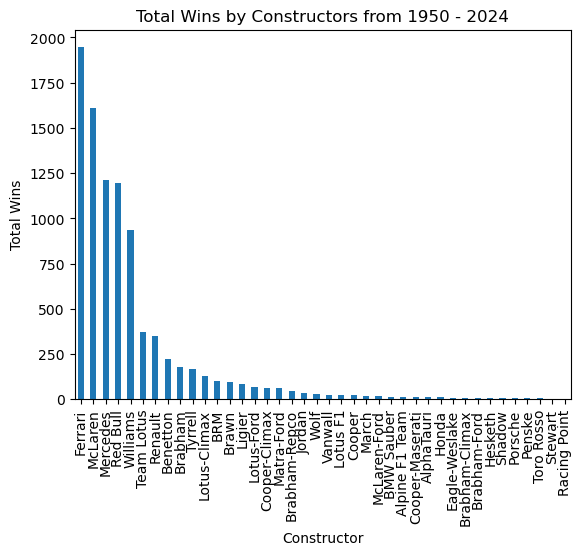

In [43]:
# Declare the file path for the constructor_standings CSV
constructor_standings_file_path = '/Users/noetorres/Desktop/archive/constructor_standings.csv'

# Import the constructor_standings data
constructor_standings_df = pd.read_csv(constructor_standings_file_path)

# Sanity check / Print the constructor standings DF
# constructor_standings_df.head()

# Drop the unnecessary columns
columns_to_drop = ['constructorStandingsId', 'raceId', 'points', 'position', 'positionText']
con_wins_df = constructor_standings_df.drop(columns=columns_to_drop, axis=1)

# sanity check
# con_wins_df.head()

# group by the constructor id and sum all the victories
grouped_con_wins_df = con_wins_df.groupby('constructorId').sum()

#sanity check / print the table
# grouped_con_wins_df.head()

# Declare the file path for the constructors CSV
constructors_file_path = '/Users/noetorres/Desktop/archive/constructors.csv'

# Import the constructors data
constructors_df = pd.read_csv(constructors_file_path)

# Sanity check / Print the constructor standings DF
# constructors_df.head(200)

# Remove the uneccessary columns
columns_to_drop = ['constructorRef', 'nationality', 'url']
constructors_df = constructors_df.drop(columns=columns_to_drop, axis=1)

# sanity check
# constructors_df.head()

# merge groupegrouped_con_wins_df and constructors_df by the constructorId
merged_con_wins_df = grouped_con_wins_df.merge(constructors_df, on='constructorId')

# sanity check
# merged_con_wins_df.head()

#sort by descending wins
sorted_con_wins_df = merged_con_wins_df.sort_values(by='wins', ascending=False)

# drop anything past the first 50
top50_con_wins_df = sorted_con_wins_df.iloc[:40]

#sanity check
print (top50_con_wins_df)

# set the values of the ticks to the names instead of the id's
new_labels = top50_con_wins_df['name'].tolist()

#sanity check
#print(new_labels)

#create a bar chart to visualize the wins for each constructor
con_wins_graph = top50_con_wins_df['wins'].plot(kind='bar')

con_wins_graph.set_xticks(range(len(new_labels)))
con_wins_graph.set_xticklabels(new_labels)

con_wins_graph.set_xlabel('Constructor')
con_wins_graph.set_ylabel('Total Wins')
con_wins_graph.set_title('Total Wins by Constructors from 1950 - 2024')

In [65]:
# Declare the file path for the driver_standings CSV
driver_standings_file_path = '/Users/noetorres/Desktop/archive/driver_standings.csv'

# Import the driver_standings data
driver_standings_df = pd.read_csv(driver_standings_file_path)

# Sanity check / Print the driver_standings DF
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [85]:
# Declare the file path for the drivers CSV
drivers_file_path = '/Users/noetorres/Desktop/archive/drivers.csv'

# Import the drivers data
drivers_df = pd.read_csv(drivers_file_path)

# Sanity check / Print the drivers DF
drivers_df.head()

#drop the unnecessary columns
columns_to_drop=['driverRef', 'number', 'dob', 'url']
drivers_df.drop(columns=columns_to_drop, axis=1)

,driverId,code,forename,surname,nationality
0,1,HAM,Lewis,Hamilton,British
1,2,HEI,Nick,Heidfeld,German
2,3,ROS,Nico,Rosberg,German
3,4,ALO,Fernando,Alonso,Spanish
4,5,KOV,Heikki,Kovalainen,Finnish
...,...,...,...,...,...
854,856,DEV,Nyck,de Vries,Dutch
855,857,PIA,Oscar,Piastri,Australian
856,858,SAR,Logan,Sargeant,American
857,859,LAW,Liam,Lawson,New Zealander


In [69]:
# Declare the file path for the lap_times CSV
lap_times_file_path = '/Users/noetorres/Desktop/archive/lap_times.csv'

# Import the lap_times data
lap_times_df = pd.read_csv(lap_times_file_path)

# Sanity check / Print the lap_times DF
lap_times_df.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [71]:
# Declare the file path for the pit_stops CSV
pit_stops_file_path = '/Users/noetorres/Desktop/archive/pit_stops.csv'

# Import the pit_stops data
pit_stops_df = pd.read_csv(pit_stops_file_path)

# Sanity check / Print the pit_stops DF
pit_stops_df.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [73]:
# Declare the file path for the qualifying CSV
qualifying_file_path = '/Users/noetorres/Desktop/archive/qualifying.csv'

# Import the qualifying data
qualifying_df = pd.read_csv(qualifying_file_path)

# Sanity check / Print the qualifying DF
qualifying_df.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [75]:
# Declare the file path for the races CSV
races_file_path = '/Users/noetorres/Desktop/archive/races.csv'

# Import the races data
races_df = pd.read_csv(races_file_path)

# Sanity check / Print the races DF
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [77]:
# Declare the file path for the results CSV
results_file_path = '/Users/noetorres/Desktop/archive/results.csv'

# Import the results data
results_df = pd.read_csv(results_file_path)

# Sanity check / Print the results DF
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [79]:
# Declare the file path for the seasons CSV
seasons_file_path = '/Users/noetorres/Desktop/archive/seasons.csv'

# Import the seasons data
seasons_df = pd.read_csv(seasons_file_path)

# Sanity check / Print the seasons DF
seasons_df.head()

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [81]:
# Declare the file path for the sprint_results CSV
sprint_results_file_path = '/Users/noetorres/Desktop/archive/sprint_results.csv'

# Import the sprint_results data
sprint_results_df = pd.read_csv(sprint_results_file_path)

# Sanity check / Print the sprint_results DF
sprint_results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [83]:
# Declare the file path for the status CSV
status_file_path = '/Users/noetorres/Desktop/archive/status.csv'

# Import the status data
status_df = pd.read_csv(status_file_path)

# Sanity check / Print the status DF
status_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
